## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

### 1. 데이터 불러오기

In [77]:
import numpy as np
import pandas as pd

In [78]:
RANDOM_STATE = 11

data = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [80]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


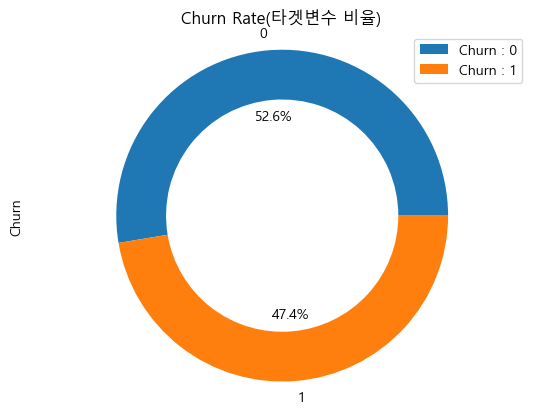

In [81]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 그리기
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Churn Rate(타겟변수 비율)')
plt.legend(['Churn : 0', 'Churn : 1'])
plt.axis('equal')
plt.show()

### 2. 데이터 탐색

CustomerID: 고객 식별 번호    
Age: 고객의 나이   
Gender: 고객의 성별     
Tenure: 고객이 서비스를 이용한 기간  
Usage Frequency: 서비스 사용 빈도   
Support Calls: 고객 지원 센터에 전화한 횟수  
Payment Delay: 지불 지연 횟수  
Subscription Type: 구독 유형  
Contract Length: 계약 기간  
Total Spend: 총 지출 금액  
Last Interaction: 마지막 상호작용 시점  
Churn: 이탈 여부 (0: 이탈 x, 1: 이탈 o)    

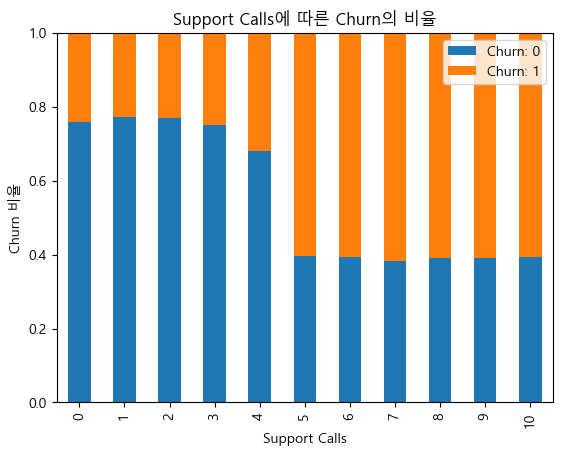

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Support Calls에 따른 Churn의 비율 계산
churn_distribution = data.groupby(['Support Calls', 'Churn']).size().unstack().fillna(0)
churn_ratio = churn_distribution.div(churn_distribution.sum(axis=1), axis=0)

# 비율 시각화
churn_ratio.plot(kind='bar', stacked=True)
plt.title('Support Calls에 따른 Churn의 비율')
plt.xlabel('Support Calls')
plt.ylabel('Churn 비율')
plt.ylim(0, 1)
plt.legend(['Churn: 0', 'Churn: 1'])
plt.show()

Support Calls의 값 4를 기점으로 churn 1 비율이 높아짐

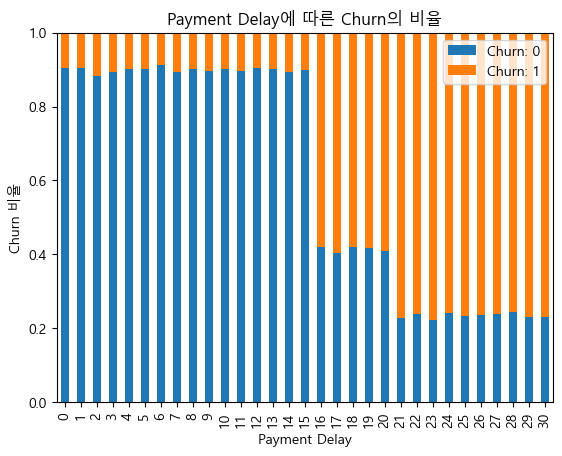

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Payment Delay에 따른 Churn의 비율 계산
churn_distribution = data.groupby(['Payment Delay', 'Churn']).size().unstack().fillna(0)
churn_ratio = churn_distribution.div(churn_distribution.sum(axis=1), axis=0)

# 비율 시각화
churn_ratio.plot(kind='bar', stacked=True)
plt.title('Payment Delay에 따른 Churn의 비율')
plt.xlabel('Payment Delay')
plt.ylabel('Churn 비율')
plt.ylim(0, 1)
plt.legend(['Churn: 0', 'Churn: 1'])
plt.show()

Payment Delay의 값 15를 기점으로 churn 1 비율이 높아짐

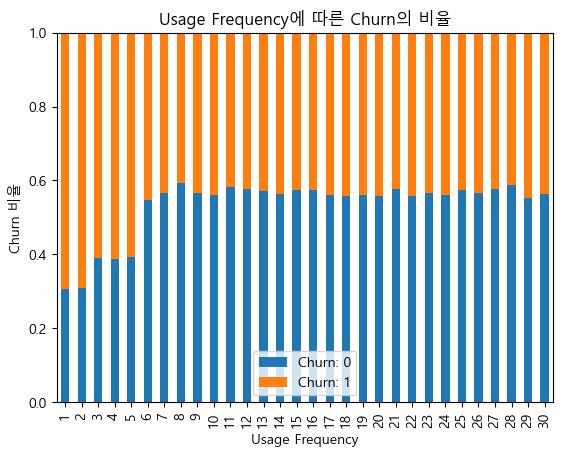

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Usage Frequency에 따른 Churn의 비율 계산
churn_distribution = data.groupby(['Usage Frequency', 'Churn']).size().unstack().fillna(0)
churn_ratio = churn_distribution.div(churn_distribution.sum(axis=1), axis=0)

# 비율 시각화
churn_ratio.plot(kind='bar', stacked=True)
plt.title('Usage Frequency에 따른 Churn의 비율')
plt.xlabel('Usage Frequency')
plt.ylabel('Churn 비율')
plt.ylim(0, 1)
plt.legend(['Churn: 0', 'Churn: 1'])
plt.show()

Usage Frequency의 값 5를 기점으로 churn 1 비율이 낮아짐

### 3. 데이터 전처리

파생변수의 추가여부에 따른 차이를 비교를 위한 데이터셋 생성

In [85]:
# 데이터셋 생성
data_plus = data.copy()

In [86]:
# 파생변수 생성 : 가중치 부여
data_plus['Usage Frequency weight'] = data_plus['Usage Frequency'].apply(lambda x: 1 if x <= 5 else 0)
data_plus['Support Calls weight'] = data_plus['Support Calls'].apply(lambda x: 0 if x <= 4 else 1)
data_plus['Payment Delay weight'] = data_plus['Payment Delay'].apply(lambda x: 0 if x <= 15 else 1)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [88]:
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              64374 non-null  int64 
 1   Age                     64374 non-null  int64 
 2   Gender                  64374 non-null  object
 3   Tenure                  64374 non-null  int64 
 4   Usage Frequency         64374 non-null  int64 
 5   Support Calls           64374 non-null  int64 
 6   Payment Delay           64374 non-null  int64 
 7   Subscription Type       64374 non-null  object
 8   Contract Length         64374 non-null  object
 9   Total Spend             64374 non-null  int64 
 10  Last Interaction        64374 non-null  int64 
 11  Churn                   64374 non-null  int64 
 12  Usage Frequency weight  64374 non-null  int64 
 13  Support Calls weight    64374 non-null  int64 
 14  Payment Delay weight    64374 non-null  int64 
dtypes:

라벨인코딩

원본 데이터셋 적용

In [89]:
from sklearn.preprocessing import LabelEncoder

# object 타입 변수 식별
object_columns = data.select_dtypes(include=['object']).columns

# 라벨 인코더 생성
label_encoders = {col: LabelEncoder() for col in object_columns}

# 각 object 타입 변수에 대해 라벨 인코딩 수행
for col, le in label_encoders.items():
    data[col] = le.fit_transform(data[col])

# 결과 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         64374 non-null  int64
 1   Age                64374 non-null  int64
 2   Gender             64374 non-null  int32
 3   Tenure             64374 non-null  int64
 4   Usage Frequency    64374 non-null  int64
 5   Support Calls      64374 non-null  int64
 6   Payment Delay      64374 non-null  int64
 7   Subscription Type  64374 non-null  int32
 8   Contract Length    64374 non-null  int32
 9   Total Spend        64374 non-null  int64
 10  Last Interaction   64374 non-null  int64
 11  Churn              64374 non-null  int64
dtypes: int32(3), int64(9)
memory usage: 5.2 MB


파생변수 추가한 데이터셋 적용

In [90]:
from sklearn.preprocessing import LabelEncoder

# object 타입 변수 식별
object_columns = data_plus.select_dtypes(include=['object']).columns

# 라벨 인코더 생성
label_encoders = {col: LabelEncoder() for col in object_columns}

# 각 object 타입 변수에 대해 라벨 인코딩 수행
for col, le in label_encoders.items():
    data_plus[col] = le.fit_transform(data_plus[col])

# 결과 확인
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              64374 non-null  int64
 1   Age                     64374 non-null  int64
 2   Gender                  64374 non-null  int32
 3   Tenure                  64374 non-null  int64
 4   Usage Frequency         64374 non-null  int64
 5   Support Calls           64374 non-null  int64
 6   Payment Delay           64374 non-null  int64
 7   Subscription Type       64374 non-null  int32
 8   Contract Length         64374 non-null  int32
 9   Total Spend             64374 non-null  int64
 10  Last Interaction        64374 non-null  int64
 11  Churn                   64374 non-null  int64
 12  Usage Frequency weight  64374 non-null  int64
 13  Support Calls weight    64374 non-null  int64
 14  Payment Delay weight    64374 non-null  int64
dtypes: int32(3), int64(

### 4. 분석(예측)

원본 데이터셋 이용

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# ID 변수와 target 변수 제외
X = data.drop(columns=['CustomerID', 'Churn'])
y = data['Churn']

# 데이터를 2:8로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=RANDOM_STATE)

In [92]:
# rf 모델 학습
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 지표 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9946407766990292
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     27149
           1       1.00      0.99      0.99     24351

    accuracy                           0.99     51500
   macro avg       0.99      0.99      0.99     51500
weighted avg       0.99      0.99      0.99     51500



In [93]:
# lgbm 모델 학습
lgbm_model = LGBMClassifier(random_state=RANDOM_STATE, verbose=-1)
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_test)

# 성능 지표 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.998757281553398
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27149
           1       1.00      1.00      1.00     24351

    accuracy                           1.00     51500
   macro avg       1.00      1.00      1.00     51500
weighted avg       1.00      1.00      1.00     51500



파생변수 추가한 데이터셋 이용

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# ID 변수와 target 변수 제외
X = data_plus.drop(columns=['CustomerID', 'Churn'])
y = data_plus['Churn']

# 데이터를 2:8로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=RANDOM_STATE)

In [95]:
# rf 모델 학습
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 지표 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9925825242718447
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     27149
           1       0.99      0.99      0.99     24351

    accuracy                           0.99     51500
   macro avg       0.99      0.99      0.99     51500
weighted avg       0.99      0.99      0.99     51500



In [96]:
# lgbm 모델 학습
lgbm_model = LGBMClassifier(random_state=RANDOM_STATE, verbose=-1)
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_test)

# 성능 지표 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9988349514563106
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27149
           1       1.00      1.00      1.00     24351

    accuracy                           1.00     51500
   macro avg       1.00      1.00      1.00     51500
weighted avg       1.00      1.00      1.00     51500



랜덤포레스트,lightGBM 2가지 모델에 대해서 다른 데이터셋으로 2번씩 학습을 진행하여  
성능비교를 하였을때 크게 차이나는 부분은 없음  

### 5. 결과 해석

아래의 3가지 변수에 대해서   

- Usage Frequency: 서비스 사용 빈도   
- Support Calls: 고객 지원 센터에 전화한 횟수  
- Payment Delay: 지불 지연 횟수 

가중치를 부여하는 파생변수를 생성하였을때 큰 성능차이를 보이지는 않았지만  
EDA 과정에서 특정구간을 벗어나면 고객이탈 비율이 급변하는 구간이 발생  

이러한 점을 이용해 기업은 Usage Frequency, Support Calls, Payment Delay 의 일정 기준에 따라  
고객 이탈을 예측할수 있고 또한 방지하는 솔루션을 고안해 낼수있다.  

.